<a href="https://colab.research.google.com/github/sunaina1701/Covid-drug-bioactive-properties-dimensionality-reduction/blob/main/covid_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
df = pd.read_csv('/content/Covid drug bioactive properties.csv')
print("Dataset loaded successfully.")
print("Shape of the original dataset:", df.shape)
print("First 5 rows of the dataset:")
print(df.head())

Dataset loaded successfully.
Shape of the original dataset: (100, 34)
First 5 rows of the dataset:
                                              SMILES  MolecularWeight  XLogP  \
0  ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...            473.4    5.6   
1  CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...            510.0    4.9   
2  CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...            519.1    6.3   
3  CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...            519.1    6.3   
4  CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...            460.0    4.4   

    ExactMass  MonoisotopicMass   TPSA  Complexity  Charge  HBondDonorCount  \
0  471.998609        471.998609  121.0         559       0                1   
1  509.035865        509.035865  126.0         670       0                1   
2  518.013024        518.013024  175.0         627       0                1   
3  518.013024        518.013024  175.0         635       0                1   
4  459.004901        459.

In [ ]:
if 'MolecularWeight' in df.columns:
    X = df.drop('MolecularWeight', axis=1)
    y = df['MolecularWeight']
    print("\nSeparated features (X) and MolecularWeight(y).")


Separated features (X) and MolecularWeight(y).


In [ ]:
# Scaling is often necessary for dimensionality reduction techniques
scaler = StandardScaler()

# Remove non-numeric columns before scaling
non_numeric_cols = ['SMILES', 'pIC50']
X_numeric = X.drop(columns=non_numeric_cols, errors='ignore')

X_scaled = scaler.fit_transform(X_numeric)
print("\nSeparated features scaled using StandardScaler.")
print("Shape of scaled features:", X_scaled.shape)


Separated features scaled using StandardScaler.
Shape of scaled features: (100, 31)


In [ ]:
n_components_pca = 2
pca = PCA(n_components=n_components_pca)
# Fit PCA on the scaled data
X_pca = pca.fit_transform(X_scaled)
print(f"\nPerformed PCA with {n_components_pca} components.")
print("Shape of PCA transformed data:", X_pca.shape)


Performed PCA with 2 components.
Shape of PCA transformed data: (100, 2)


In [ ]:
# Explained variance ratio
print("\nExplained variance ratio by each PCA component:", pca.explained_variance_ratio_)
print("Total explained variance by selected components:", sum(pca.explained_variance_ratio_))


Explained variance ratio by each PCA component: [0.39210654 0.10733763]
Total explained variance by selected components: 0.49944417146831455


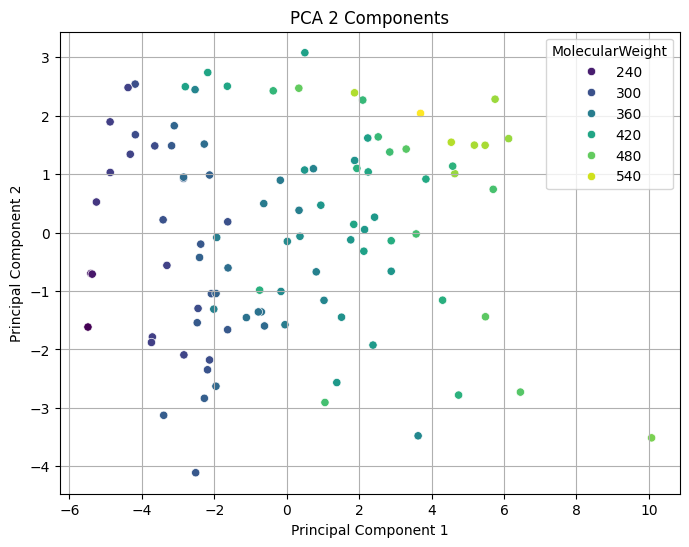

In [ ]:
# Visualize PCA results (if n_components_pca is 2)
if n_components_pca == 2:
    plt.figure(figsize=(8, 6))
    if y is not None:
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
    else:
         sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], palette='viridis')
    plt.title('PCA 2 Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()
else:
    print("\nVisualization for PCA is typically done with 2 components. Skipping visualization.")


In [ ]:
# --- Dimensionality Reduction using t-SNE ---
# t-SNE is good for visualizing high-dimensional data in 2 or 3 dimensions.
# It's computationally more expensive than PCA and non-linear.

# Choose the number of components (usually 2 or 3 for visualization)
n_components_tsne = 2
# Perplexity is a sensitive parameter. Values between 5 and 50 are common.
# n_iter is the number of iterations. A higher number can lead to a better embedding but takes longer.
tsne = TSNE(n_components=n_components_tsne, perplexity=30, n_iter=300, random_state=42)
# Fit t-SNE on the scaled data
# t-SNE is usually applied after PCA for better performance, especially on large datasets.
# You can apply it directly on X_scaled or X_pca. Applying on X_pca (if done) is often better.
try:
    X_tsne = tsne.fit_transform(X_scaled) # Applying on scaled data
    print(f"\nPerformed t-SNE with {n_components_tsne} components.")
    print("Shape of t-SNE transformed data:", X_tsne.shape)
except Exception as e:
    print(f"\nAn error occurred during t-SNE fitting: {e}")

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Performed t-SNE with 2 components.
Shape of t-SNE transformed data: (100, 2)


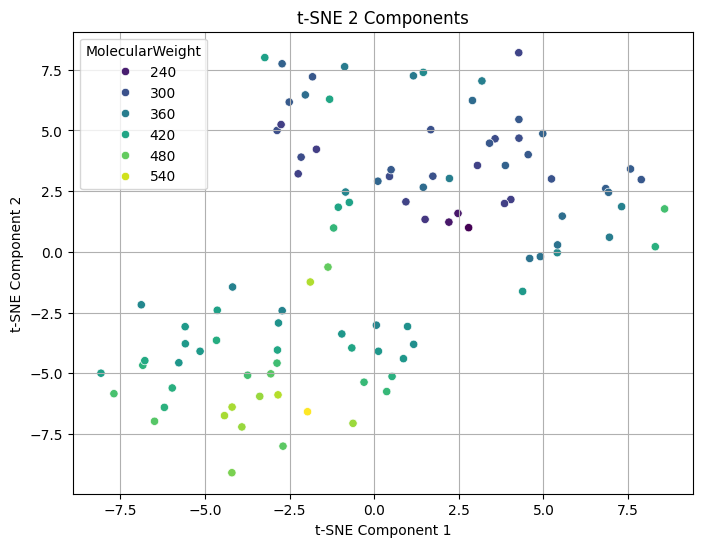

In [ ]:
# Visualize t-SNE results (if n_components_tsne is 2)
if n_components_tsne == 2:
    plt.figure(figsize=(8, 6))
    if y is not None:
         sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis')
    else:
         sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], palette='viridis')
    plt.title('t-SNE 2 Components')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True)
    plt.show()
else:
    print("\nVisualization for t-SNE is typically done with 2 components. Skipping visualization.")

# The original code had an extra try-except block here, which is not needed
# as the fitting error is handled in the previous cell.
# except Exception as e:
#     print(f"\nAn error occurred during t-SNE execution: {e}")
#     print("t-SNE can be sensitive to data characteristics and parameters. You might need to adjust perplexity or n_iter, or consider applying it after PCA.")

In [ ]:
print ("\nUsing the PCA transformed data (X_pca) for further steps.")
print ("X_pca head:")
print (pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components_pca)]).head())


Using the PCA transformed data (X_pca) for further steps.
X_pca head:
        PC1       PC2
0  3.300384  1.428195
1  4.642084  1.007282
2  5.183110  1.495161
3  5.480659  1.493065
4  3.575323 -0.023858


In [ ]:
print ("\nUsing the t-SNE transformed data (X_tsne) for further steps.")
print("X_tsne head:")
print(pd.DataFrame(X_tsne, columns=[f'TSNE{i+1}' for i in range(n_components_tsne)]).head())


Using the t-SNE transformed data (X_tsne) for further steps.
X_tsne head:
      TSNE1     TSNE2
0 -3.057483 -5.026087
1 -3.382980 -5.953856
2 -4.200599 -6.394534
3 -4.425684 -6.747482
4 -3.741693 -5.082896


In [ ]:
if y is not None:
    from sklearn.model_selection import train_test_split
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    print("\nSplit PCA data into training and testing sets.")
    print("X_train_pca shape:", X_train_pca.shape)
    print("X_test_pca shape:", X_test_pca.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)


Split PCA data into training and testing sets.
X_train_pca shape: (80, 2)
X_test_pca shape: (20, 2)
y_train shape: (80,)
y_test shape: (20,)


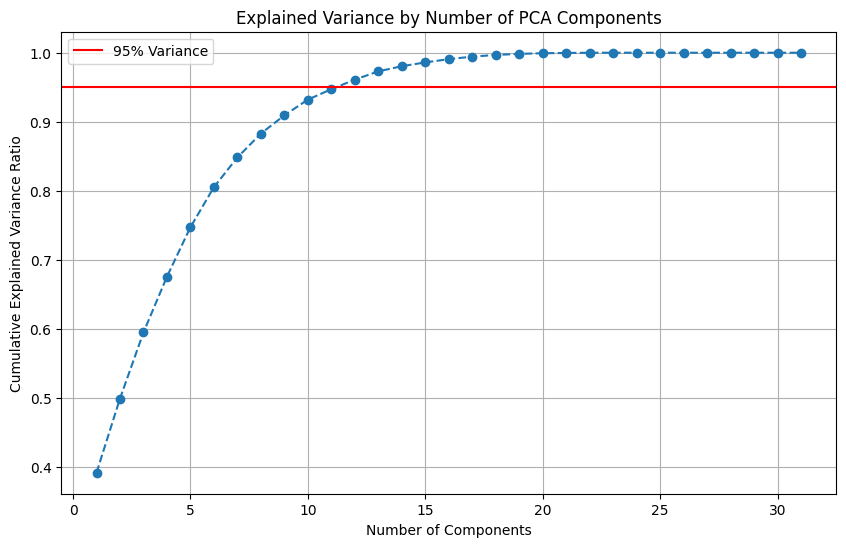


Cumulative explained variance for full PCA:
  Components 1: 0.3921
  Components 2: 0.4994
  Components 3: 0.5952
  Components 4: 0.6759
  Components 5: 0.7475
  Components 6: 0.8055
  Components 7: 0.8484
  Components 8: 0.8830
  Components 9: 0.9094
  Components 10: 0.9321
  Components 11: 0.9472
  Components 12: 0.9610
  Components 13: 0.9730
  Components 14: 0.9805
  Components 15: 0.9860
  Components 16: 0.9907
  Components 17: 0.9943
  Components 18: 0.9968
  Components 19: 0.9983
  Components 20: 0.9993
  Components 21: 0.9997
  Components 22: 1.0000
  Components 23: 1.0000
  Components 24: 1.0000
  Components 25: 1.0000
  Components 26: 1.0000
  Components 27: 1.0000
  Components 28: 1.0000
  Components 29: 1.0000
  Components 30: 1.0000
  Components 31: 1.0000


In [ ]:
# To determine the optimal number of PCA components, you can plot the explained variance ratio.
if 'pca' in locals() and hasattr(pca, 'explained_variance_ratio_') and sum(pca.explained_variance_ratio_) < 0.99:
    pca_full = PCA()
    pca_full.fit(X_scaled)

    plt.figure(figsize=(10, 6))
    import numpy as np
    plt.plot(range(1, pca_full.n_components_ + 1), np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
    plt.title('Explained Variance by Number of PCA Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance') # Example threshold
    plt.legend()
    plt.grid(True)
    plt.show()

    print ("\nCumulative explained variance for full PCA:")
    cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
    for i, cv in enumerate(cumulative_variance):
        print(f"  Components {i+1}: {cv:.4f}")

In [ ]:
# Remove rows with 'BLINDED' in 'pIC50' column
X_cleaned = X[X['pIC50'] != 'BLINDED'].copy()
y_cleaned = y[X['pIC50'] != 'BLINDED'].copy()

# Convert 'pIC50' to numeric after removing 'BLINDED'
y_cleaned = pd.to_numeric(y_cleaned)

# Split the data into training and testing sets
# We'll use a test set size of 20% (0.2) and a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Scale the features (optional but recommended for many models)
scaler = StandardScaler()
# Remove non-numeric columns before scaling
non_numeric_cols = ['SMILES', 'pIC50']
X_train_numeric = X_train.drop(columns=non_numeric_cols, errors='ignore')
X_test_numeric = X_test.drop(columns=non_numeric_cols, errors='ignore')

X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
# Train a Random Forest model to compute feature importance
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
# Use the scaled training data for fitting
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train_numeric.columns).sort_values(ascending=False)

<ipython-input-22-3026773750>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='Set2')


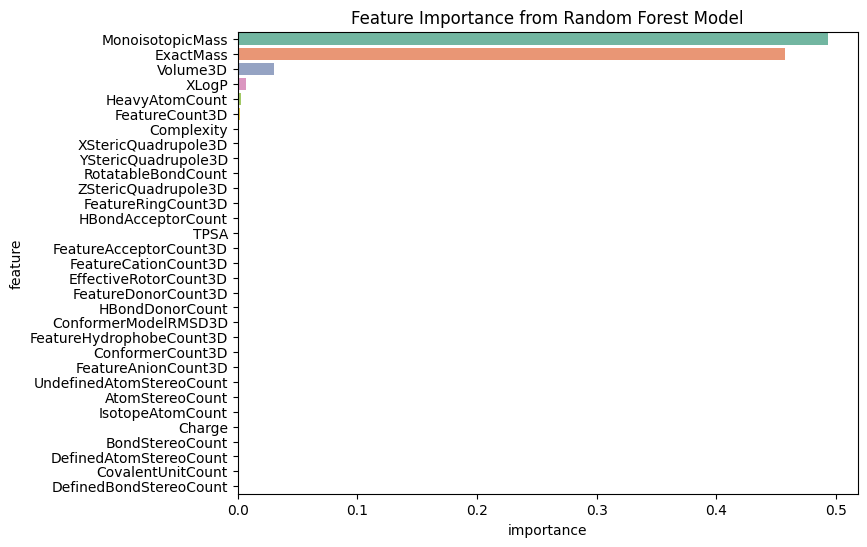

In [ ]:
# Convert the feature_importance Series to a DataFrame
feature_importance_df = feature_importance.reset_index()
feature_importance_df.columns = ['feature', 'importance']

#re plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='Set2')
plt.title('Feature Importance from Random Forest Model')
plt.show()

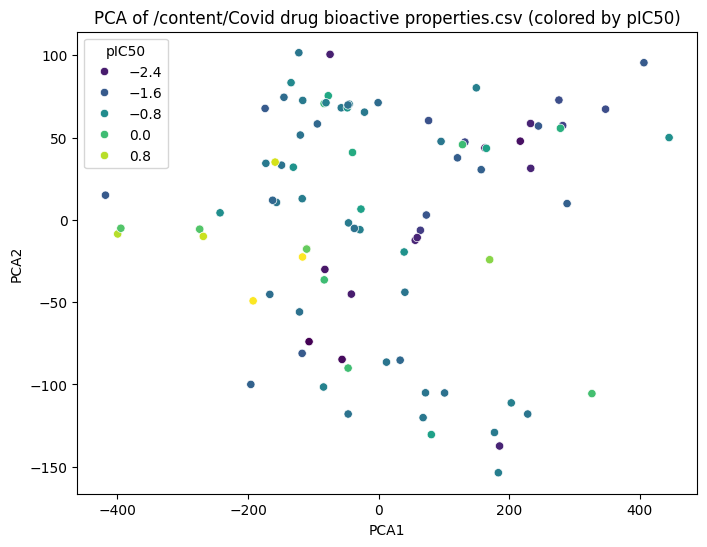

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)

# Remove non-numeric columns before applying PCA
non_numeric_cols = ['SMILES', 'pIC50']
X_numeric = X.drop(columns=non_numeric_cols, errors='ignore')

# Ensure 'pIC50' is numeric and handle 'BLINDED' values
pic50_numeric = pd.to_numeric(X['pIC50'], errors='coerce')

# Clean the numeric data by dropping rows where pIC50 was 'BLINDED' (now NaN)
X_cleaned_numeric = X_numeric.loc[pic50_numeric.dropna().index]
y_cleaned_pic50 = pic50_numeric.dropna()

# Re-run PCA on the cleaned numeric data
X_pca_cleaned = pca.fit_transform(X_cleaned_numeric)

# Create a DataFrame with PCA components from the cleaned data
pca_df = pd.DataFrame(X_pca_cleaned, columns=['PCA1', 'PCA2'])

# Add the cleaned pIC50 values to the pca_df
pca_df['pIC50'] = y_cleaned_pic50.values # Use .values to ensure correct alignment

# Plot the 2D PCA components
plt.figure(figsize=(8, 6))
# Check which column is available for hue
if 'MolecularWeight' in X_cleaned_numeric.columns: # Check in the cleaned numeric data
    # Need to align MolecularWeight with the cleaned data as well
    molecular_weight_cleaned = X['MolecularWeight'].loc[pic50_numeric.dropna().index].reset_index(drop=True)
    pca_df['MolecularWeight'] = molecular_weight_cleaned
    sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='MolecularWeight', palette='viridis')
    plt.title('PCA of /content/Covid drug bioactive properties.csv (colored by MolecularWeight)')
elif 'pIC50' in pca_df.columns:
    sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='pIC50', palette='viridis')
    plt.title('PCA of /content/Covid drug bioactive properties.csv (colored by pIC50)')
else:
    sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', palette='viridis')
    plt.title('PCA of /content/Covid drug bioactive properties.csv')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
# Prepare data
X = df.drop('MolecularWeight', axis=1)
y = df['MolecularWeight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
# Remove non-numeric columns before scaling
non_numeric_cols = ['SMILES', 'pIC50']
X_train_numeric = X_train.drop(columns=non_numeric_cols, errors='ignore')
X_test_numeric = X_test.drop(columns=non_numeric_cols, errors='ignore')

X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Linear Regression (as a regression model for continuous target)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression() # Linear Regression doesn't have max_iter like Logistic Regression
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("Linear Regression Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))

Linear Regression Mean Squared Error: 0.06290130354397865


In [ ]:
# SVR (Support Vector Regressor)
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
print("SVR Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))

SVR Mean Squared Error: 129.2375988045397


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_model = DecisionTreeRegressor(random_state=42)
# Decision trees can handle non-scaled data, but using scaled data is fine too
# Based on previous cells, X_train and X_test still contain non-numeric columns
# Let's use the scaled numeric data for consistency with other models
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
print("Decision Tree Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))

Decision Tree Mean Squared Error: 79.9853600000001


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Remove non-numeric columns before fitting
non_numeric_cols = ['SMILES', 'pIC50']
X_train_numeric = X_train.drop(columns=non_numeric_cols, errors='ignore')
X_test_numeric = X_test.drop(columns=non_numeric_cols, errors='ignore')

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Use the numeric training data for fitting
rf_model.fit(X_train_numeric, y_train)
y_pred_rf = rf_model.predict(X_test_numeric)
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))

Random Forest Mean Squared Error: 49.91083895499945


In [ ]:
# Comparing performances using Mean Squared Error (MSE)
models = ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest']
mse_values = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_svr),
    mean_squared_error(y_test, y_pred_dt),
    mean_squared_error(y_test, y_pred_rf)
]
performance_df = pd.DataFrame({'Model': models, 'Mean Squared Error': mse_values})
performance_df.sort_values(by='Mean Squared Error', ascending=True, inplace=True)
print("Model Performance Comparison (Mean Squared Error):")
display(performance_df)

Model Performance Comparison (Mean Squared Error):


,Model,Mean Squared Error
0,Linear Regression,0.062901
3,Random Forest,49.910839
2,Decision Tree,79.985360
1,SVR,129.237599


In [ ]:
import plotly.express as px

# Create a bar chart using Plotly Express
fig = px.bar(performance_df, x='Model', y='Mean Squared Error', title='Model Performance Comparison (Mean Squared Error)')

# Customize the chart (optional)
fig.update_layout(xaxis_title='Model', yaxis_title='Mean Squared Error')

# Show the chart
fig.show()